# Práctica 1: Aprendizaje automático

__Fecha de entrega: 9 de marzo de 2022__

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. La práctica consta de 3 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

# Apartado 1: Clustering

__Número de grupo: XX__

__Nombres de los estudiantes: XXX y XXX__

In [152]:
import numpy as np
import pandas as pd

## 1) Carga del conjunto de datos

Crea un dataframe a partir del fichero `prestamos.csv` que se proporciona junto con la práctica. 

El conjunto de datos contiene por cada fila los datos de un préstamo que fue concedido por una empresa de crédito p2p. Las variables que caracterizan el préstamo son las siguientes:
  - `loan_amnt` es la cantidad de dinero solicitada en dólares
  - `purpose` es el propósito para el que se solicitó el préstamo
  - `revenue` son los ingresos anuales en dólares de la persona que solicitó el préstamos
  - `dti_n` es el porcentaje de endeudamiento sobre los ingresos anuales de la persona que solicitó el préstamo
  - `fico_n` se trata de un indicador de solvencia de la persona que solicitó el préstamo. A mayor puntuación, mayor solvencia, y además se cuenta con estos rangos orientativoss:
    - 300-550: Pobre
    - 550-620: Subprime (alto riesgo)
    - 620-680: Crédito aceptable
    - 680-740: Buen crédito
    - 740-850: Excelente crédito

  -`home_ownership_n` es una variable categórica que indica la situación de vivienda en la que vive la persona solicitante
    - `OWN` es en propiedad
    - `MORTAGAGE` indica que está hipotecada
    - `RENT` indica que vive en alquiler
    - `OTHER` es una categoría que agrega otras posibilidades

- `emp_length` es una variable ordinal, no es estrictamente numérica, ya que el valor 0 denota que no consta información, los valores entre 1 y 10 indican una permanencia inferior a X años, y el valor 11 indica una permanencia superior a 10 años.
- `Default` es la variable que usaremos como **variable objetivo** del conjunto de datos e indica si la persona incumplió (incurrió en *default*) o no el préstamo.


Como pandas no tiene forma de saber que las variables `home_ownership_n`, `emp_length` y `Default` son en realidad categóricas, debes indicárselo tú.

In [153]:
df = pd.read_csv('prestamos.csv')
for col in ['home_ownership_n','emp_length_n','Default','purpose']:
    df[col] = df[col].astype('category')
df

,loan_amnt,purpose,revenue,dti_n,fico_n,home_ownership_n,emp_length_n,Default
0,32000,car,135000.0,18.93,687.0,MORTGAGE,1,0
1,32000,car,90000.0,9.29,822.0,MORTGAGE,10,1
2,30000,car,95000.0,1.34,722.0,RENT,11,0
3,25750,car,230000.0,6.42,747.0,MORTGAGE,11,0
4,25200,car,72000.0,30.95,692.0,OWN,11,0
...,...,...,...,...,...,...,...,...
13789,1275,vacation,42000.0,31.89,792.0,RENT,0,0
13790,1200,vacation,36000.0,12.27,747.0,MORTGAGE,8,0
13791,1000,vacation,76000.0,25.26,702.0,MORTGAGE,11,0
13792,1000,vacation,32000.0,17.70,747.0,MORTGAGE,0,0


## 2) Análisis de los datos

### 2.1) Numéricos

Analiza razonadamente las distribuciones de cada una de las variables numéricas (medias, desviaciones típicas, rangos, ...) y las principales relaciones entre pares de variables (diagrama de dispersión, coeficientes de correlación, ...).

In [154]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,13794.0,14507.833116,9037.938271,1000.0,7300.0,12000.000,20000.0000,40000.00
revenue,13794.0,79737.299507,56463.579892,7000.0,48000.0,68000.000,97000.0000,1650000.00
dti_n,13794.0,18.825106,9.795986,0.0,12.2,18.085,24.7575,190.87
fico_n,13794.0,699.106822,32.825754,662.0,672.0,692.000,717.0000,847.50


In [155]:
df.corr()

,loan_amnt,revenue,dti_n,fico_n
loan_amnt,1.000000,0.424460,0.034134,0.090869
revenue,0.424460,1.000000,-0.137616,0.091204
dti_n,0.034134,-0.137616,1.000000,-0.057580
fico_n,0.090869,0.091204,-0.057580,1.000000


<AxesSubplot:xlabel='revenue', ylabel='loan_amnt'>

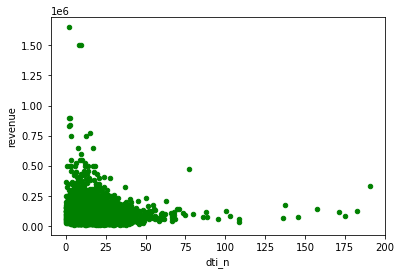

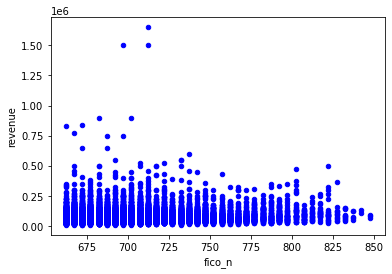

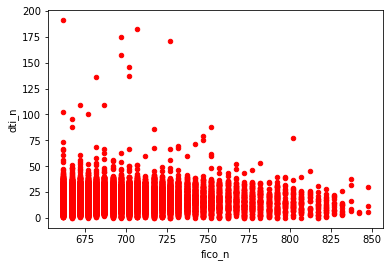

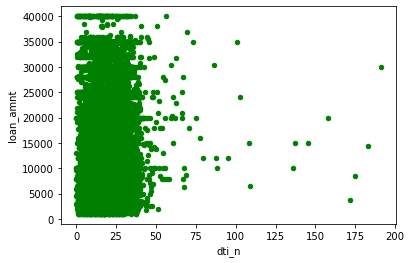

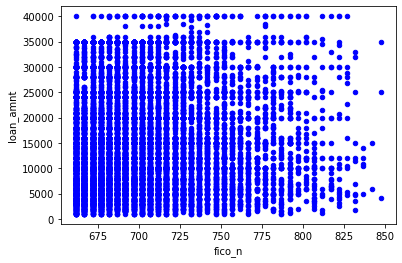

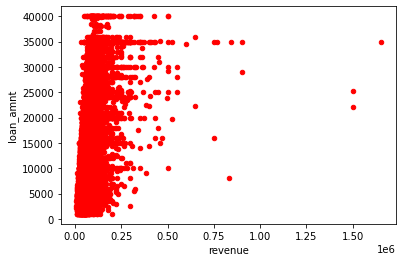

In [156]:
# Ahora vamos a mostrar el diagrama de dispersión entre dos variables
df.plot.scatter(x='dti_n', y='revenue', c='Green')
# Ahora vamos a mostrar el diagrama de dispersión entre dos variables
df.plot.scatter(x='fico_n', y='revenue', c='Blue')
# Ahora vamos a mostrar el diagrama de dispersión entre dos variables
df.plot.scatter(x='fico_n', y='dti_n', c='Red')
# Ahora vamos a mostrar el diagrama de dispersión entre dos variables
df.plot.scatter(x='dti_n', y='loan_amnt', c='Green')
# Ahora vamos a mostrar el diagrama de dispersión entre dos variables
df.plot.scatter(x='fico_n', y='loan_amnt', c='Blue')
# Ahora vamos a mostrar el diagrama de dispersión entre dos variables
df.plot.scatter(x='revenue', y='loan_amnt', c='Red')




### 2.2) Categóricos

Analiza razonadamente las distribuciones de los valores de las variables categóricas incluyendo un diagrama de frecuencias y comentando lo más destacable.

In [157]:
df.describe(include=['category']).transpose()

,count,unique,top,freq
purpose,13794,12,debt_consolidation,7841
home_ownership_n,13794,4,MORTGAGE,6850
emp_length_n,13794,12,11,4612
Default,13794,2,0,10785


<AxesSubplot:>

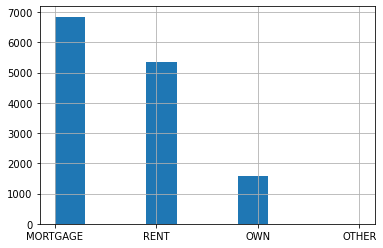

In [158]:
# Diagrama de barras mostrando cuántas veces aparece cada marca
df['home_ownership_n'].hist()

<AxesSubplot:>

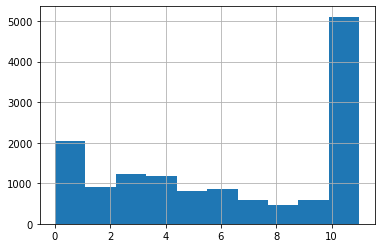

In [159]:
df['emp_length_n'].hist()

<AxesSubplot:>

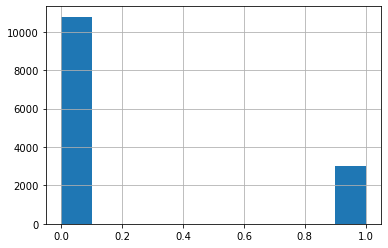

In [160]:
df['Default'].hist()

<AxesSubplot:xlabel='emp_length_n'>

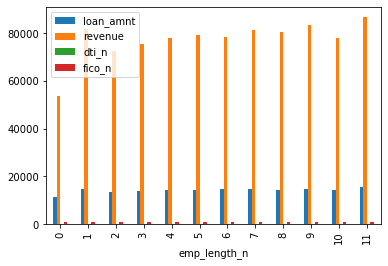

In [161]:
# Precio medio por marca como gráfica de barras
df.groupby('emp_length_n').mean('revenue').plot.bar()

array([[<AxesSubplot:xlabel='loan_amnt', ylabel='loan_amnt'>,
        <AxesSubplot:xlabel='revenue', ylabel='loan_amnt'>,
        <AxesSubplot:xlabel='dti_n', ylabel='loan_amnt'>,
        <AxesSubplot:xlabel='fico_n', ylabel='loan_amnt'>],
       [<AxesSubplot:xlabel='loan_amnt', ylabel='revenue'>,
        <AxesSubplot:xlabel='revenue', ylabel='revenue'>,
        <AxesSubplot:xlabel='dti_n', ylabel='revenue'>,
        <AxesSubplot:xlabel='fico_n', ylabel='revenue'>],
       [<AxesSubplot:xlabel='loan_amnt', ylabel='dti_n'>,
        <AxesSubplot:xlabel='revenue', ylabel='dti_n'>,
        <AxesSubplot:xlabel='dti_n', ylabel='dti_n'>,
        <AxesSubplot:xlabel='fico_n', ylabel='dti_n'>],
       [<AxesSubplot:xlabel='loan_amnt', ylabel='fico_n'>,
        <AxesSubplot:xlabel='revenue', ylabel='fico_n'>,
        <AxesSubplot:xlabel='dti_n', ylabel='fico_n'>,
        <AxesSubplot:xlabel='fico_n', ylabel='fico_n'>]], dtype=object)

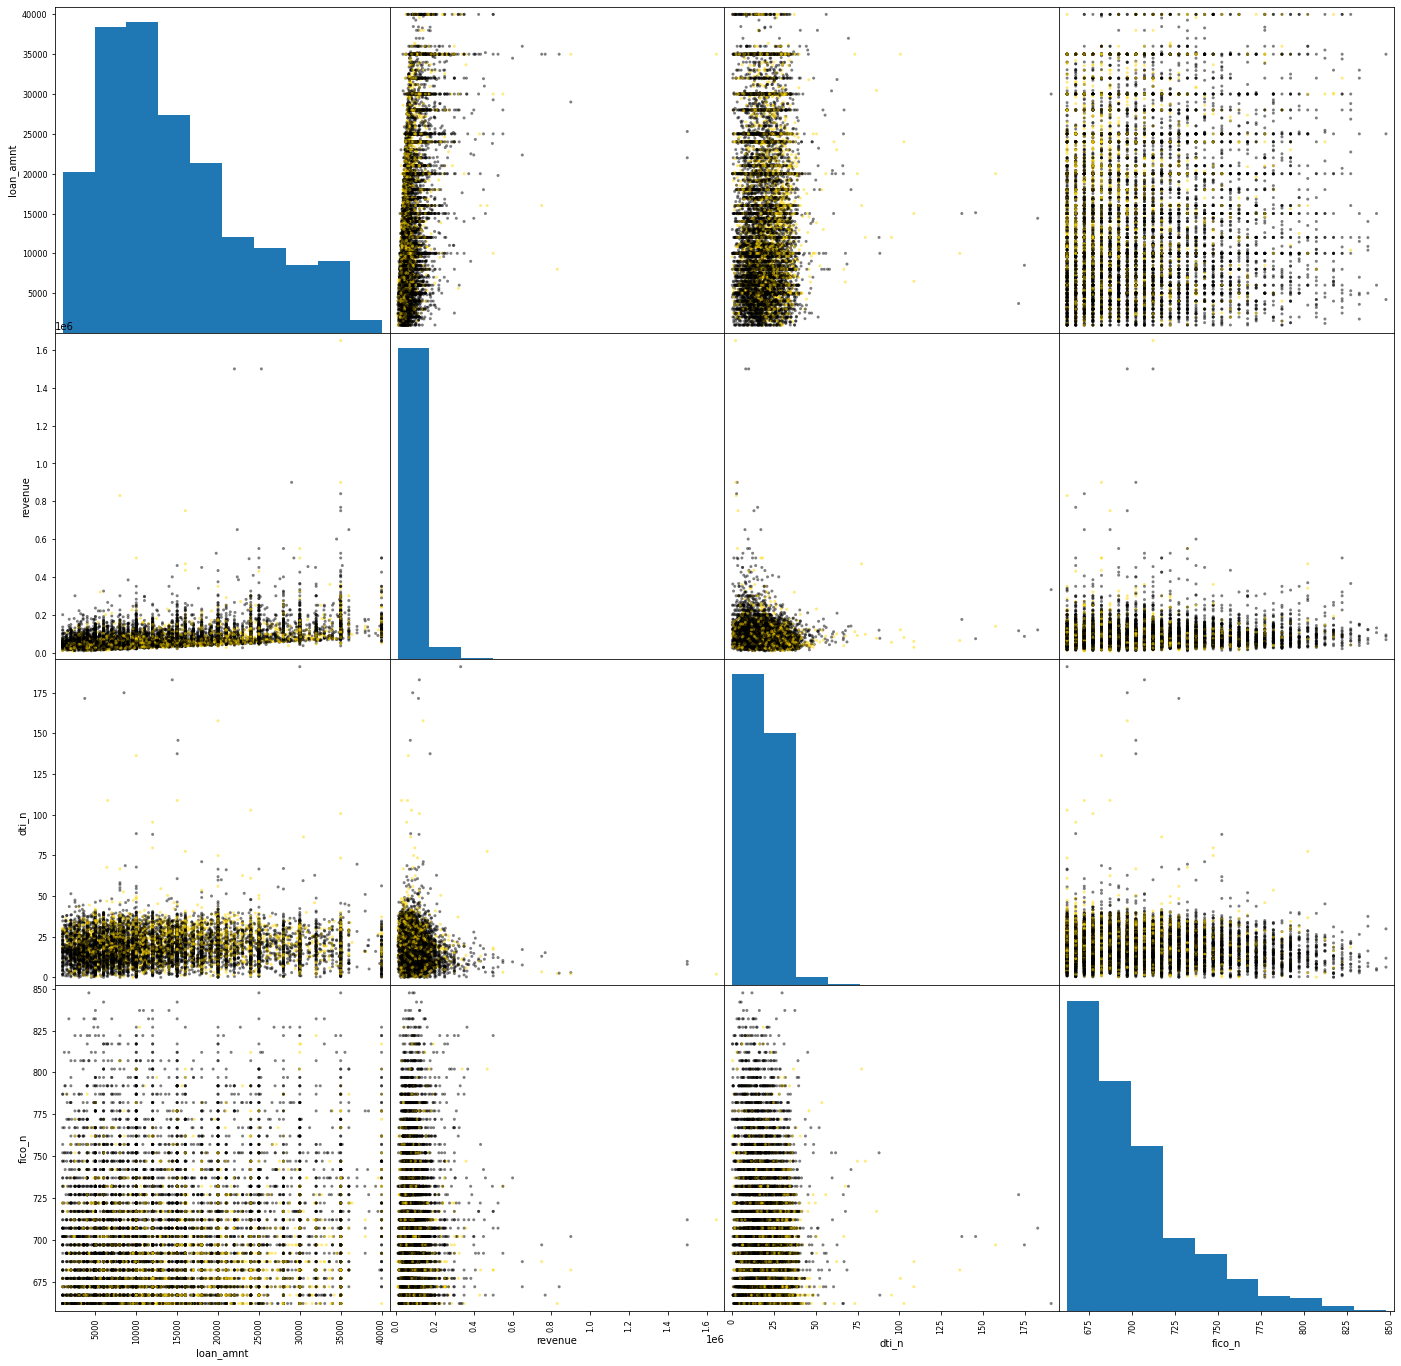

In [162]:
from pandas.plotting import scatter_matrix
%matplotlib inline

#dic_colors = { 0: 'green', 1: 'red'}
dic_colors = { 0: 'black', 1: 'gold'}
colors = df['Default'].map(dic_colors)

scatter_matrix(df, figsize = (24, 24), diagonal = 'hist', color=colors)

## 3) Preprocesar los datos

Para el clustering vamos a trabajar solamente con las variables verdaderamente numéricas. Crea un nuevo dataframe que sólo contenga las variables `loan_amnt`, `revenue`, `dti_n` y `fico_n`.

Teniendo en cuenta que vamos a utilizar el algoritmo k-Means para encontrar grupos de préstamos similares, explica razonadamente si es necesario o no cambiar la escalas de los datos y si a priori es mejor reescalarlos (MinMaxScaler) o estandarizarlos (StandarScaler).

Si decides preprocesarlos, accede al array interno del dataframe y crea un nuevo array con los datos escalados.

In [173]:
from sklearn.preprocessing import StandardScaler

df = df.loc[:,['loan_amnt', 'revenue', 'dti_n', 'fico_n']].copy()

standard_scaler = StandardScaler()

# Fase de ajuste 
standard_scaler.fit(df_std[['loan_amnt', 'revenue', 'dti_n', 'fico_n']])

# Fase de transfomación, 
# Cambiamos los valores por valores ya estandarizados
df_std[['loan_amnt', 'revenue', 'dti_n', 'fico_n']] = standard_scaler.transform(df[['loan_amnt', 'revenue', 'dti_n', 'fico_n']])

df_std.head()

,loan_amnt,revenue,dti_n,fico_n
0,32000.0,135000.0,18.93,687.0
1,32000.0,90000.0,9.29,822.0
2,30000.0,95000.0,1.34,722.0
3,25750.0,230000.0,6.42,747.0
4,25200.0,72000.0,30.95,692.0


## 4) Encontrar el número óptimo de clusters

Decide razonadamente el número óptimo de clusters en el rango 2..10. Ten en cuenta que para interpretar los datos no nos interesa tampoco tener un número excesivo de clusters. Para hacerlo calcula y pinta el diagrama del codo, el índice davies_boulding y el coeficiente silhouette en función del número de clusters.

In [164]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score
from sklearn.datasets import make_blobs
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [165]:
# Crear una instancia del agrupador k-means
X= df_std.to_numpy()
km = KMeans(init='random', n_clusters=2, random_state=333)
# Agrupar los puntos en clusters
km.fit(X)

# Podemos consultar el cluster asignado a cada punto y el centro de cada cluster
labels = km.labels_
centers = km.cluster_centers_

In [166]:
K_MAX = 10
davies_boulding = np.zeros(K_MAX-2)
for k in range(2, K_MAX): 
    km = KMeans(init='random', n_clusters=k, random_state=333)
    km.fit(X)   
    davies_boulding[k-2] = davies_bouldin_score(X, km.labels_) 

Text(0.5, 1.0, 'Valor de Davies Boulding para diferentes k')

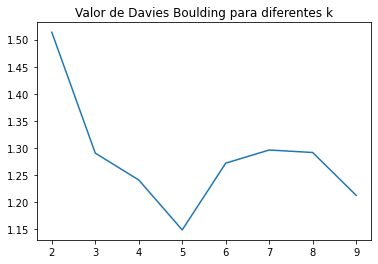

In [167]:
plt.plot(range(2, K_MAX), davies_boulding)
plt.title('Valor de Davies Boulding para diferentes k')

## 5) Descripción de los clusters

Describe los clusters que has obtenido en el apartado anterior. Si te han salido más de 3, elige 3 de ellos que sean bastante diferentes entre sí. 

Para hacerlo estudia sus descriptores estadísticos y dales un sentido dentro del contexto del problema. ¿Qué perfil de préstamos quedan en cada cluster? Según dicho perfil, ¿qué cluster te parece que tendrá una mayor tasa de "default"? Corrobóralo calculando para cada cluster la proporción de préstamos que acabaron en "default".

Pinta el diagrama de dispersión en función de cada par de variables usando colores diferentes para cada cluster. ¿Qué clusters se separan mejor y en función de qué variables? ¿y cuáles se confunden más?

__Cuidado__: para poder interpretar correctamente los datos necesitas que estén en su escala original. Si decidiste escalar los datos, deberás ejecutar k-Means con los datos escalados pero asignar las etiquetas de clusters al conjunto de datos inicial. En este caso es muy sencillo porque el algoritmo no cambia el orden de los datos así que puedes crear directamente una nueva columna en el dataframe original con esas etiquetas. Puede que aparezca un SettingWithCopyWarning por asignar una nueva columna en un dataframe que es una vista de otro dataframe. Puedes ignorar este aviso o puedes hacer una copia del dataframe con `copy` para que no comparta memoria con el otro.

Han salido cinco clusters. Hay tres áreas más diferentes, la verde, la roja, y las otras tres. Así que cogemos el cluster verde, rojo y morado, con valores de cluster *****. Veamos sus datos en la tabla

In [171]:
km = KMeans(init='random', n_clusters=5, random_state=333)
km.fit(X)

centers = km.cluster_centers_
centers

array([[ 1.40166332,  0.47616836,  0.02031082, -0.09240829],
       [ 1.31009155,  4.16512515, -0.73302448,  0.39884318],
       [-0.3833772 , -0.39974536,  1.03495379, -0.28707739],
       [-0.53870088, -0.21326436, -0.59474443, -0.47044515],
       [-0.17719914, -0.05649249, -0.31740959,  1.78751005]])

In [174]:
# 
X = df.to_numpy()
print(X)
df_cluster = pd.DataFrame(data=X, columns=['loan_amnt', 'revenue', 'dti_n', 'fico_n'])
df_cluster = df_cluster.assign(cluster=pd.Series(data=km.labels_))
df_cluster

[[3.200e+04 1.350e+05 1.893e+01 6.870e+02]
 [3.200e+04 9.000e+04 9.290e+00 8.220e+02]
 [3.000e+04 9.500e+04 1.340e+00 7.220e+02]
 ...
 [1.000e+03 7.600e+04 2.526e+01 7.020e+02]
 [1.000e+03 3.200e+04 1.770e+01 7.470e+02]
 [1.000e+03 5.500e+04 1.490e+01 6.820e+02]]


,loan_amnt,revenue,dti_n,fico_n,cluster
0,32000.0,135000.0,18.93,687.0,0
1,32000.0,90000.0,9.29,822.0,4
2,30000.0,95000.0,1.34,722.0,0
3,25750.0,230000.0,6.42,747.0,1
4,25200.0,72000.0,30.95,692.0,0
...,...,...,...,...,...
13789,1275.0,42000.0,31.89,792.0,4
13790,1200.0,36000.0,12.27,747.0,4
13791,1000.0,76000.0,25.26,702.0,2
13792,1000.0,32000.0,17.70,747.0,4


In [175]:
df_cluster.groupby(["cluster"]).describe().transpose()

cluster                      0             1              2              3  \
loan_amnt count    2881.000000  3.020000e+02    3637.000000    4996.000000   
          mean    27185.230823  2.634793e+04   11047.724773    9641.338070   
          std      5803.257371  8.879728e+03    5500.152402    4763.490894   
          min     10550.000000  2.500000e+03    1000.000000    1000.000000   
          25%     22800.000000  2.000000e+04    6500.000000    6000.000000   
          50%     26050.000000  2.800000e+04   10000.000000   10000.000000   
          75%     32000.000000  3.500000e+04   15000.000000   12800.000000   
          max     40000.000000  4.000000e+04   37000.000000   25000.000000   
revenue   count    2881.000000  3.020000e+02    3637.000000    4996.000000   
          mean   106677.344877  3.149067e+05   57182.368774   67702.252566   
          std     36320.317421  1.701477e+05   25899.625932   31832.214819   
          min     25000.000000  1.890000e+05    7000.000000    8400.000000   
          25%     80000.000000  2.332500e+05   40000.000000   45000.000000   
          50%    100000.000000  2.600000e+05   52000.000000   61000.000000   
          75%    130000.000000  3.237500e+05   70000.000000   84000.000000   
          max    230000.000000  1.650000e+06  332500.000000  221000.000000   
dti_n     count    2881.000000  3.020000e+02    3637.000000    4996.000000   
          mean       19.019566  1.164467e+01      28.960517      12.999291   
          std         7.516473  7.628159e+00       9.393975       5.025965   
          min         0.220000  1.200000e-01      19.000000       0.000000   
          25%        13.860000  6.577500e+00      24.150000       9.340000   
          50%        18.890000  1.031500e+01      27.360000      13.380000   
          75%        23.930000  1.556750e+01      31.800000      17.130000   
          max        62.700000  7.743000e+01     190.870000      23.530000   
fico_n    count    2881.000000  3.020000e+02    3637.000000    4996.000000   
          mean      696.151336  7.121987e+02     689.673907     683.660328   
          std        23.691448  3.833703e+01      20.770508      17.141889   
          min       662.000000  6.620000e+02     662.000000     662.000000   
          25%       677.000000  6.820000e+02     672.000000     667.000000   
          50%       692.000000  7.070000e+02     687.000000     682.000000   
          75%       712.000000  7.320000e+02     707.000000     697.000000   
          max       792.000000  8.270000e+02     782.000000     727.000000   

cluster                      4  
loan_amnt count    1978.000000  
          mean    12889.092518  
          std      7466.126348  
          min      1000.000000  
          25%      7000.000000  
          50%     12000.000000  
          75%     17000.000000  
          max     40000.000000  
revenue   count    1978.000000  
          mean    76463.266471  
          std     36071.419637  
          min      9036.000000  
          25%     50000.000000  
          50%     70000.000000  
          75%     97000.000000  
          max    225000.000000  
dti_n     count    1978.000000  
          mean       15.716678  
          std         7.737271  
          min         0.000000  
          25%         9.972500  
          50%        15.460000  
          75%        20.720000  
          max        45.880000  
fico_n    count    1978.000000  
          mean      757.771739  
          std        26.296601  
          min       717.000000  
          25%       737.000000  
          50%       752.000000  
          75%       772.000000  
          max       847.500000

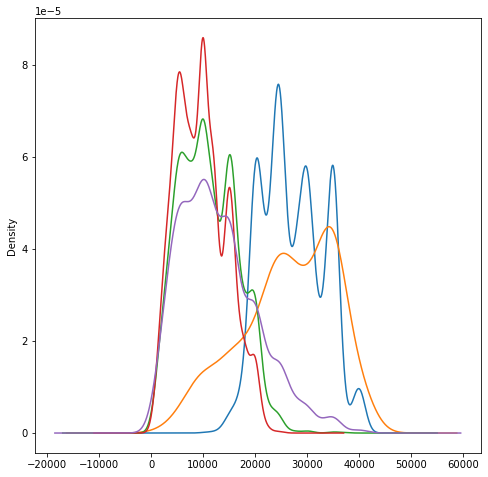

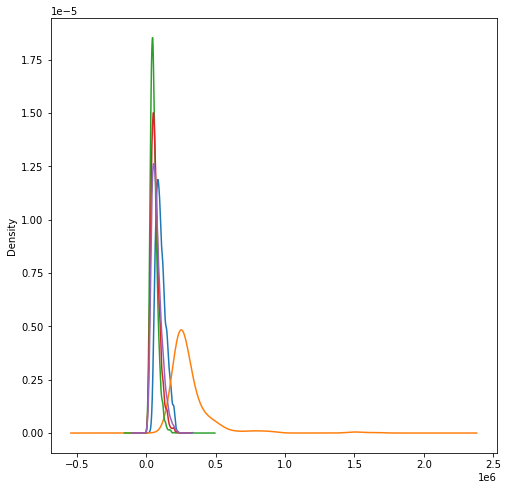

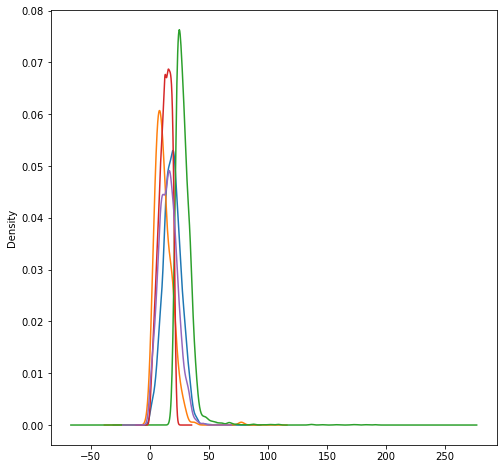

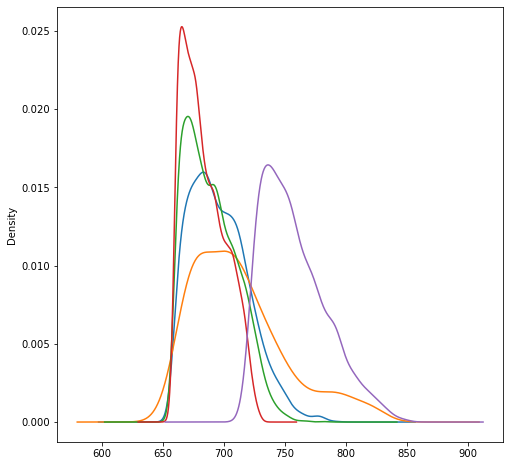

In [176]:
fig = plt.figure(figsize=(8,8))
df_cluster.groupby(["cluster"])["loan_amnt"].plot(kind="density")
plt.show()
fig = plt.figure(figsize=(8,8))
b = df_cluster.groupby(["cluster"])["revenue"].plot(kind="density")
plt.show()
fig = plt.figure(figsize=(8,8))
c = df_cluster.groupby(["cluster"])["dti_n"].plot(kind="density")
plt.show()
fig = plt.figure(figsize=(8,8))
d = df_cluster.groupby(["cluster"])["fico_n"].plot(kind="density")
plt.show()

array([[<AxesSubplot:xlabel='loan_amnt', ylabel='loan_amnt'>,
        <AxesSubplot:xlabel='revenue', ylabel='loan_amnt'>,
        <AxesSubplot:xlabel='dti_n', ylabel='loan_amnt'>,
        <AxesSubplot:xlabel='fico_n', ylabel='loan_amnt'>],
       [<AxesSubplot:xlabel='loan_amnt', ylabel='revenue'>,
        <AxesSubplot:xlabel='revenue', ylabel='revenue'>,
        <AxesSubplot:xlabel='dti_n', ylabel='revenue'>,
        <AxesSubplot:xlabel='fico_n', ylabel='revenue'>],
       [<AxesSubplot:xlabel='loan_amnt', ylabel='dti_n'>,
        <AxesSubplot:xlabel='revenue', ylabel='dti_n'>,
        <AxesSubplot:xlabel='dti_n', ylabel='dti_n'>,
        <AxesSubplot:xlabel='fico_n', ylabel='dti_n'>],
       [<AxesSubplot:xlabel='loan_amnt', ylabel='fico_n'>,
        <AxesSubplot:xlabel='revenue', ylabel='fico_n'>,
        <AxesSubplot:xlabel='dti_n', ylabel='fico_n'>,
        <AxesSubplot:xlabel='fico_n', ylabel='fico_n'>]], dtype=object)

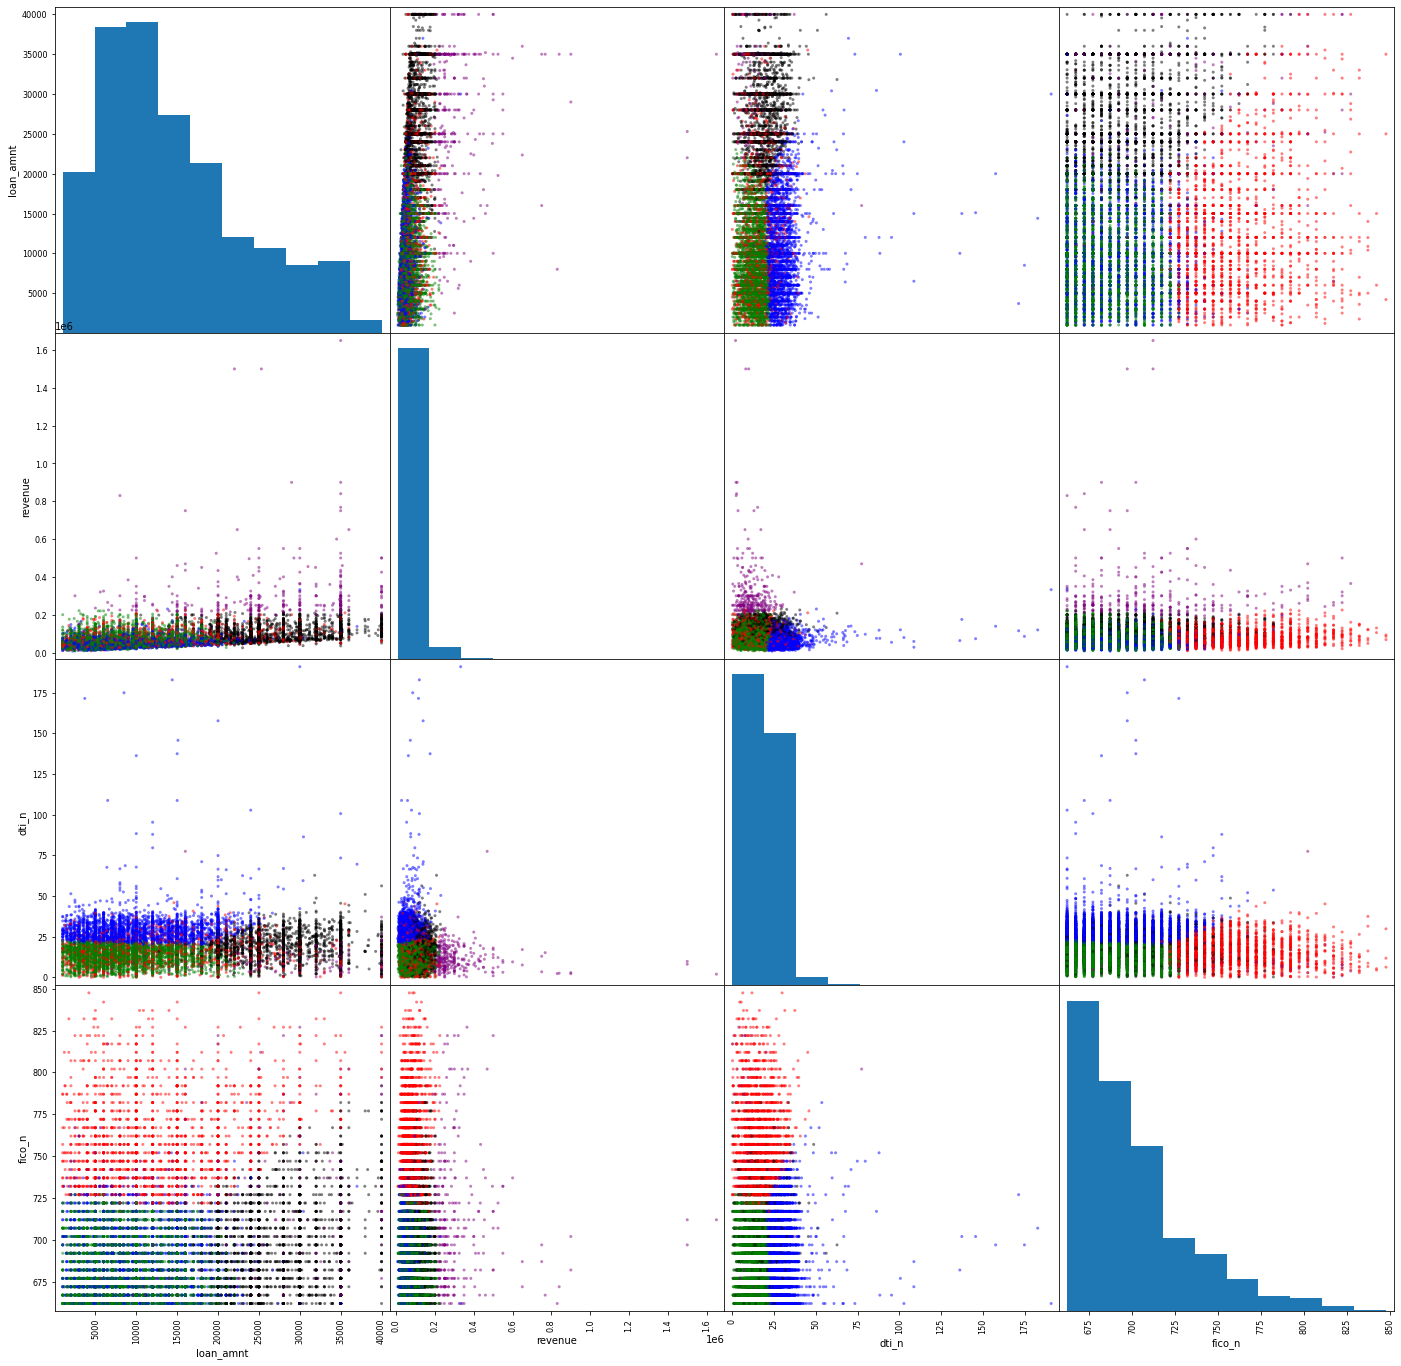

In [177]:
from pandas.plotting import scatter_matrix
%matplotlib inline

#dic_colors = { 0: 'green', 1: 'red'}
dic_colors = { 0: 'black', 1: 'purple',2: 'blue', 3:'green', 4:'red'}
colors = df_cluster["cluster"].map(dic_colors)

scatter_matrix(df, figsize = (24, 24), diagonal = 'hist', color=colors)